## Machine Learning models on Breast cancer dataset

### Importing important libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [14]:
data = pd.read_csv(r'C:\Users\abhas\Downloads\dataset_cancer.csv')

In [15]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
data.shape

(569, 33)

In [17]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

The diagnosis column has only two values to it. M - for malignant and B - for Benign.
We will use this column as our target column/ output column to build our machine learning model.

In [18]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [19]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Since, unnamed column has all 569 entries as nan so we do not need this column.

In [20]:
data['Unnamed: 32'].unique()

array([nan])

In [21]:
data.drop('Unnamed: 32', axis = 'columns', inplace = True)

In [22]:
data_copy = data.copy(deep=True)

In [23]:
y = data.diagnosis
data.drop(['diagnosis', 'id'], axis = 'columns', inplace = True)

In [24]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Performing Exploratory data analysis

In [25]:
data_copy.drop(['id'], axis = 'columns' , inplace = True)

In [26]:
data_copy.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Figure size 1440x720 with 0 Axes>

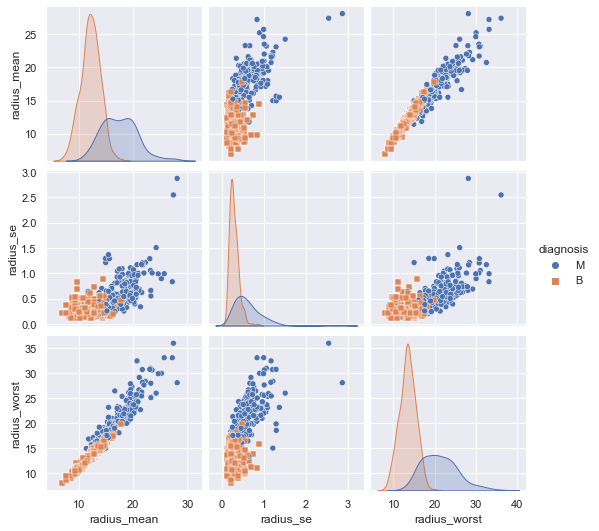

In [29]:
plt.figure(figsize = (20,10))
sns.set_theme(style="darkgrid")

radius = data_copy[['radius_mean','radius_se','radius_worst','diagnosis']]
sns.pairplot(radius, hue='diagnosis', markers=["o", "s"])

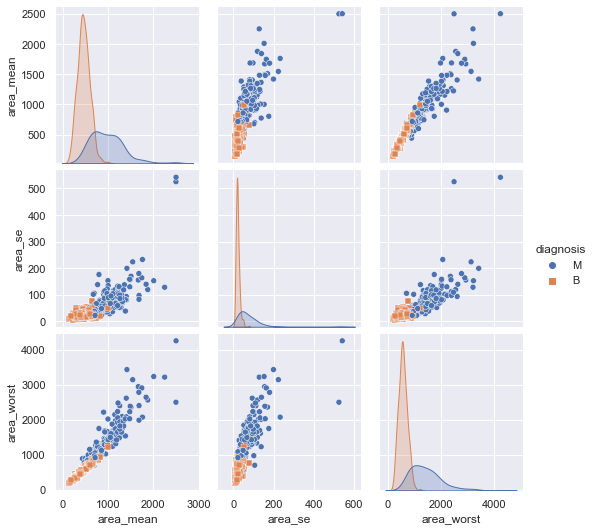

In [30]:
area = data_copy[['area_mean','area_se','area_worst','diagnosis']]
sns.pairplot(area, hue='diagnosis', markers=["o", "s"])

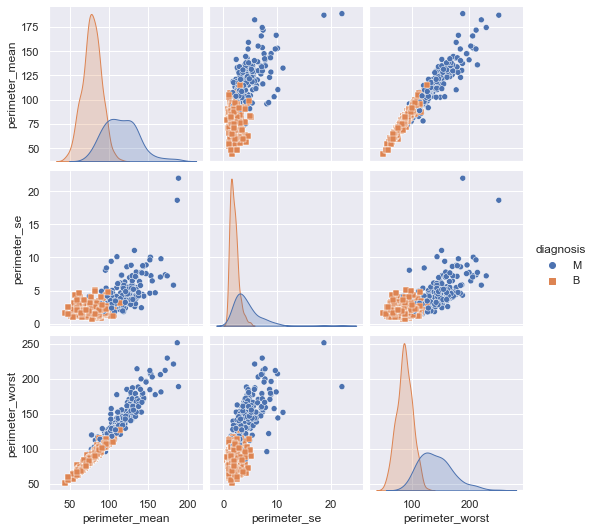

In [31]:
perimeter = data_copy[['perimeter_mean','perimeter_se','perimeter_worst','diagnosis']]
sns.pairplot(perimeter, hue='diagnosis', markers=["o", "s"])

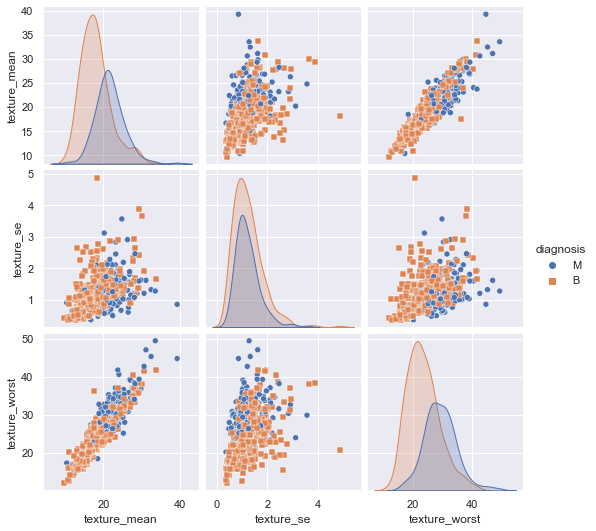

In [32]:
texture = data_copy[['texture_mean','texture_se','texture_worst','diagnosis']]
sns.pairplot(texture, hue='diagnosis', markers=["o", "s"])

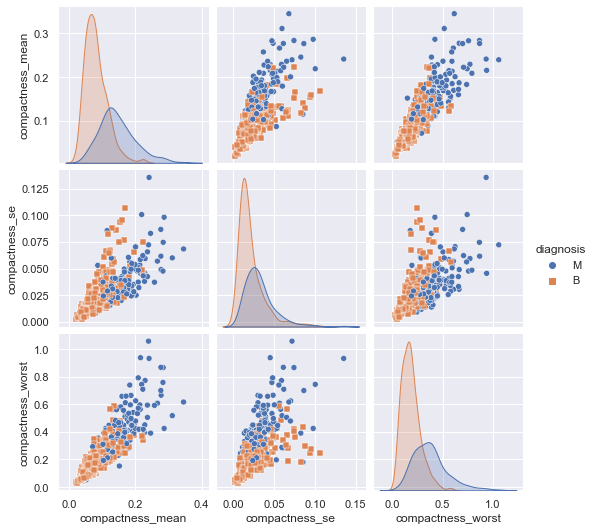

In [33]:
compactness = data_copy[['compactness_mean','compactness_se','compactness_worst','diagnosis']]
sns.pairplot(compactness, hue='diagnosis', markers=["o", "s"])

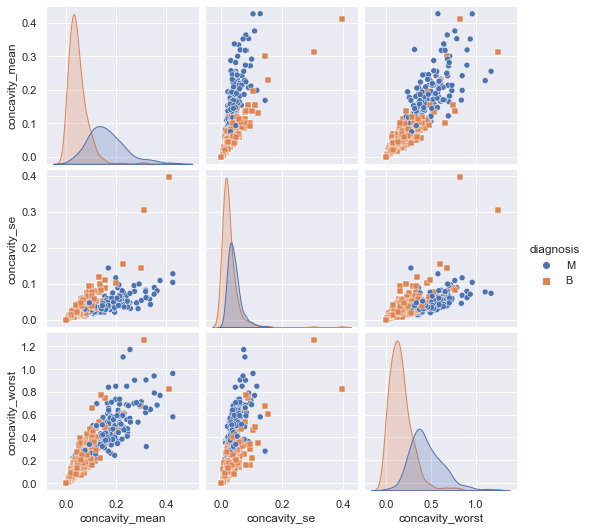

In [34]:
concavity = data_copy[['concavity_mean','concavity_se','concavity_worst','diagnosis']]
sns.pairplot(concavity, hue='diagnosis', markers=["o", "s"])

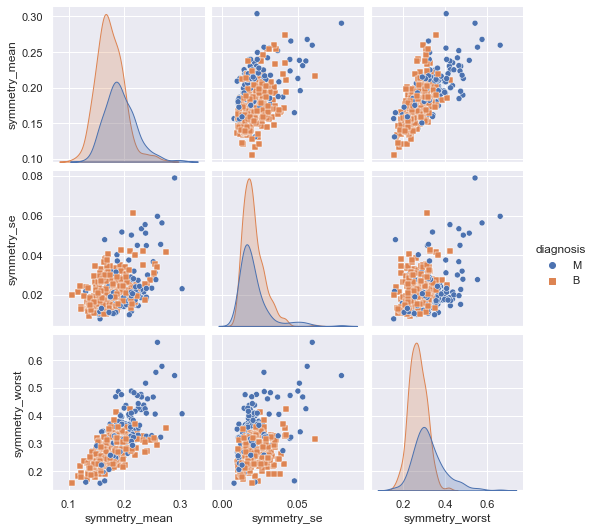

In [35]:
symmetry = data_copy[['symmetry_mean','symmetry_se','symmetry_worst','diagnosis']]
sns.pairplot(symmetry, hue='diagnosis', markers=["o", "s"])

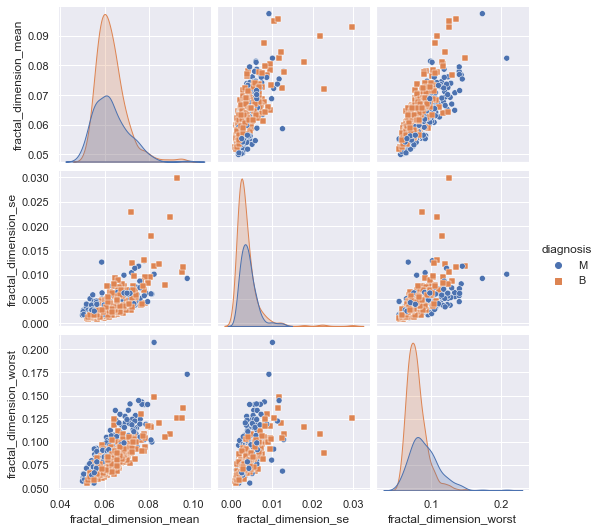

In [36]:
fractal_dimension = data_copy[['fractal_dimension_mean','fractal_dimension_se','fractal_dimension_worst','diagnosis']]
sns.pairplot(fractal_dimension, hue='diagnosis', markers=["o", "s"])

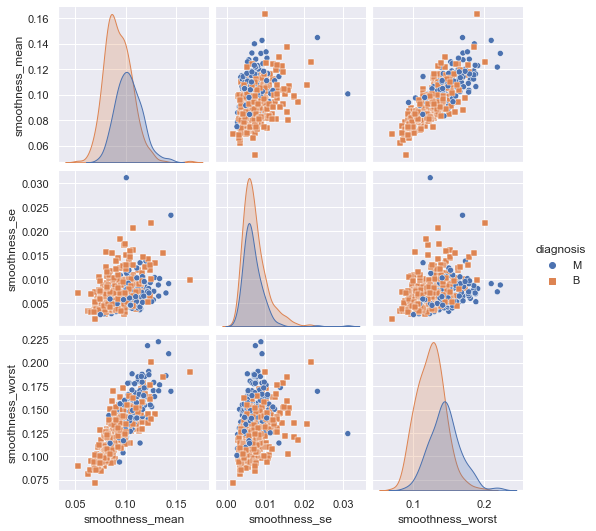

In [37]:
smoothness = data_copy[['smoothness_mean','smoothness_se','smoothness_worst','diagnosis']]
sns.pairplot(smoothness, hue='diagnosis', markers=["o", "s"])

The percentage of Benign case is : 62.741652021089635


The percentage of Malignant case is : 37.258347978910365




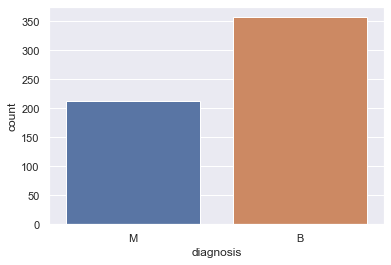

In [52]:
ax = sns.countplot(y)
Benign, Malignant = y.value_counts(normalize = True)
print(f'The percentage of Benign case is : {Benign*100}\n\n')
print(f'The percentage of Malignant case is : {Malignant*100}\n\n')

In [53]:
y=pd.DataFrame(y)

In [54]:
y

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


### Feature selection

<AxesSubplot:>

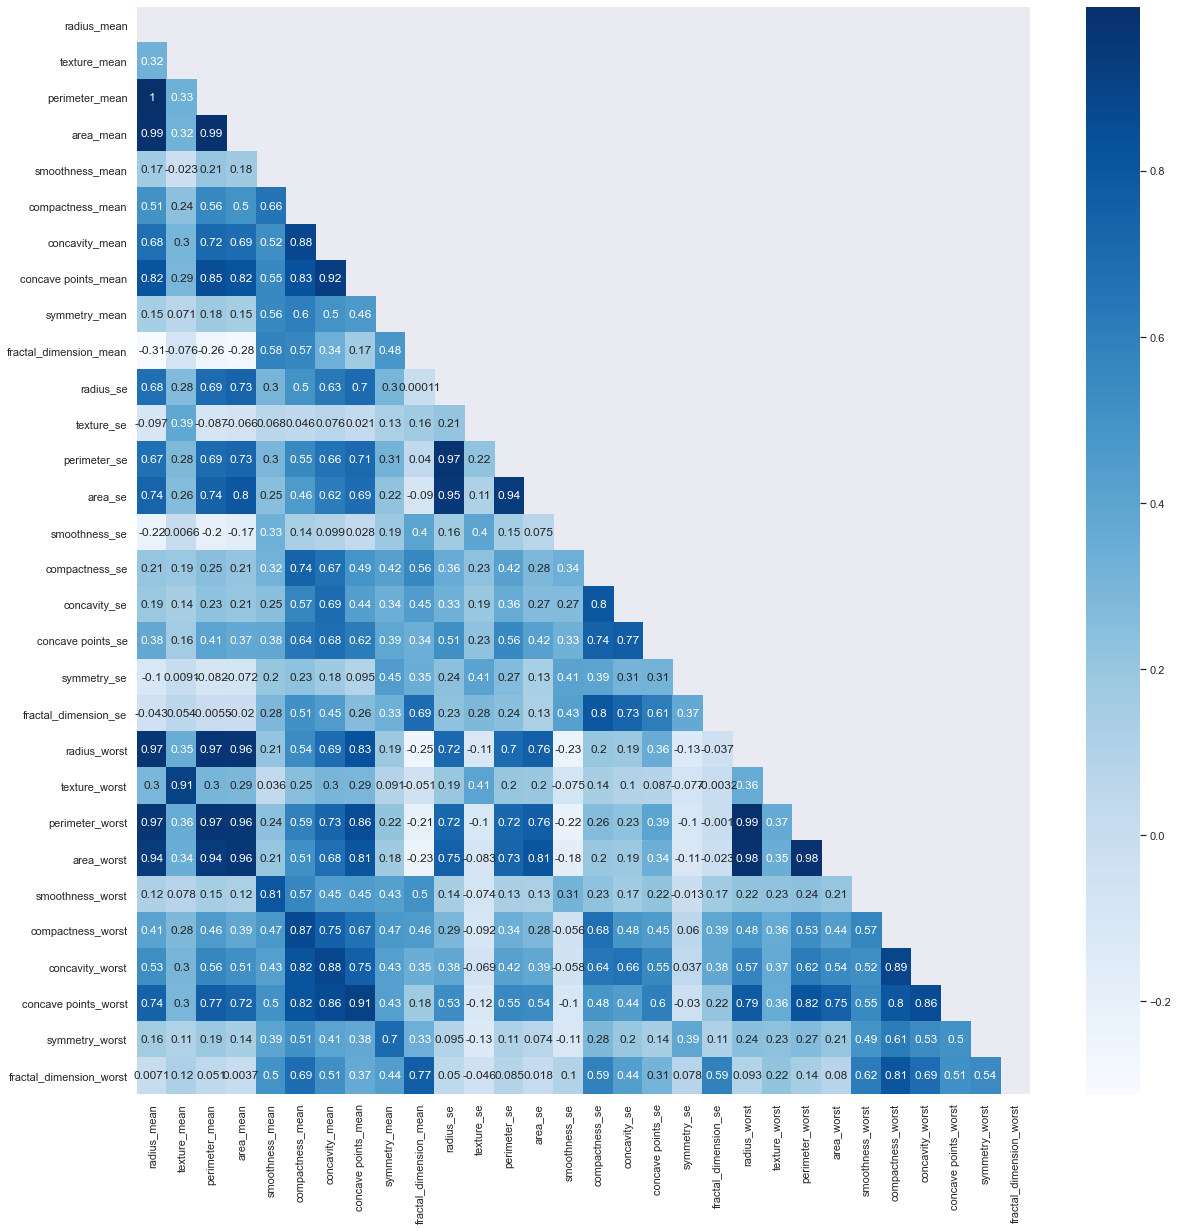

In [15]:
plt.figure(figsize=(20,20))
mask = np.triu(np.ones_like(data.corr()))
sns.heatmap(data.corr(), cmap="Blues", annot=True, mask=mask)

Eliminating those columns that have correlation of more than 0.9

In [16]:
corr = data.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [17]:
columns

array([ True,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False,  True,  True])

In [18]:
data.shape

(569, 20)

We can see that the column number have reduced from 30 to 20.

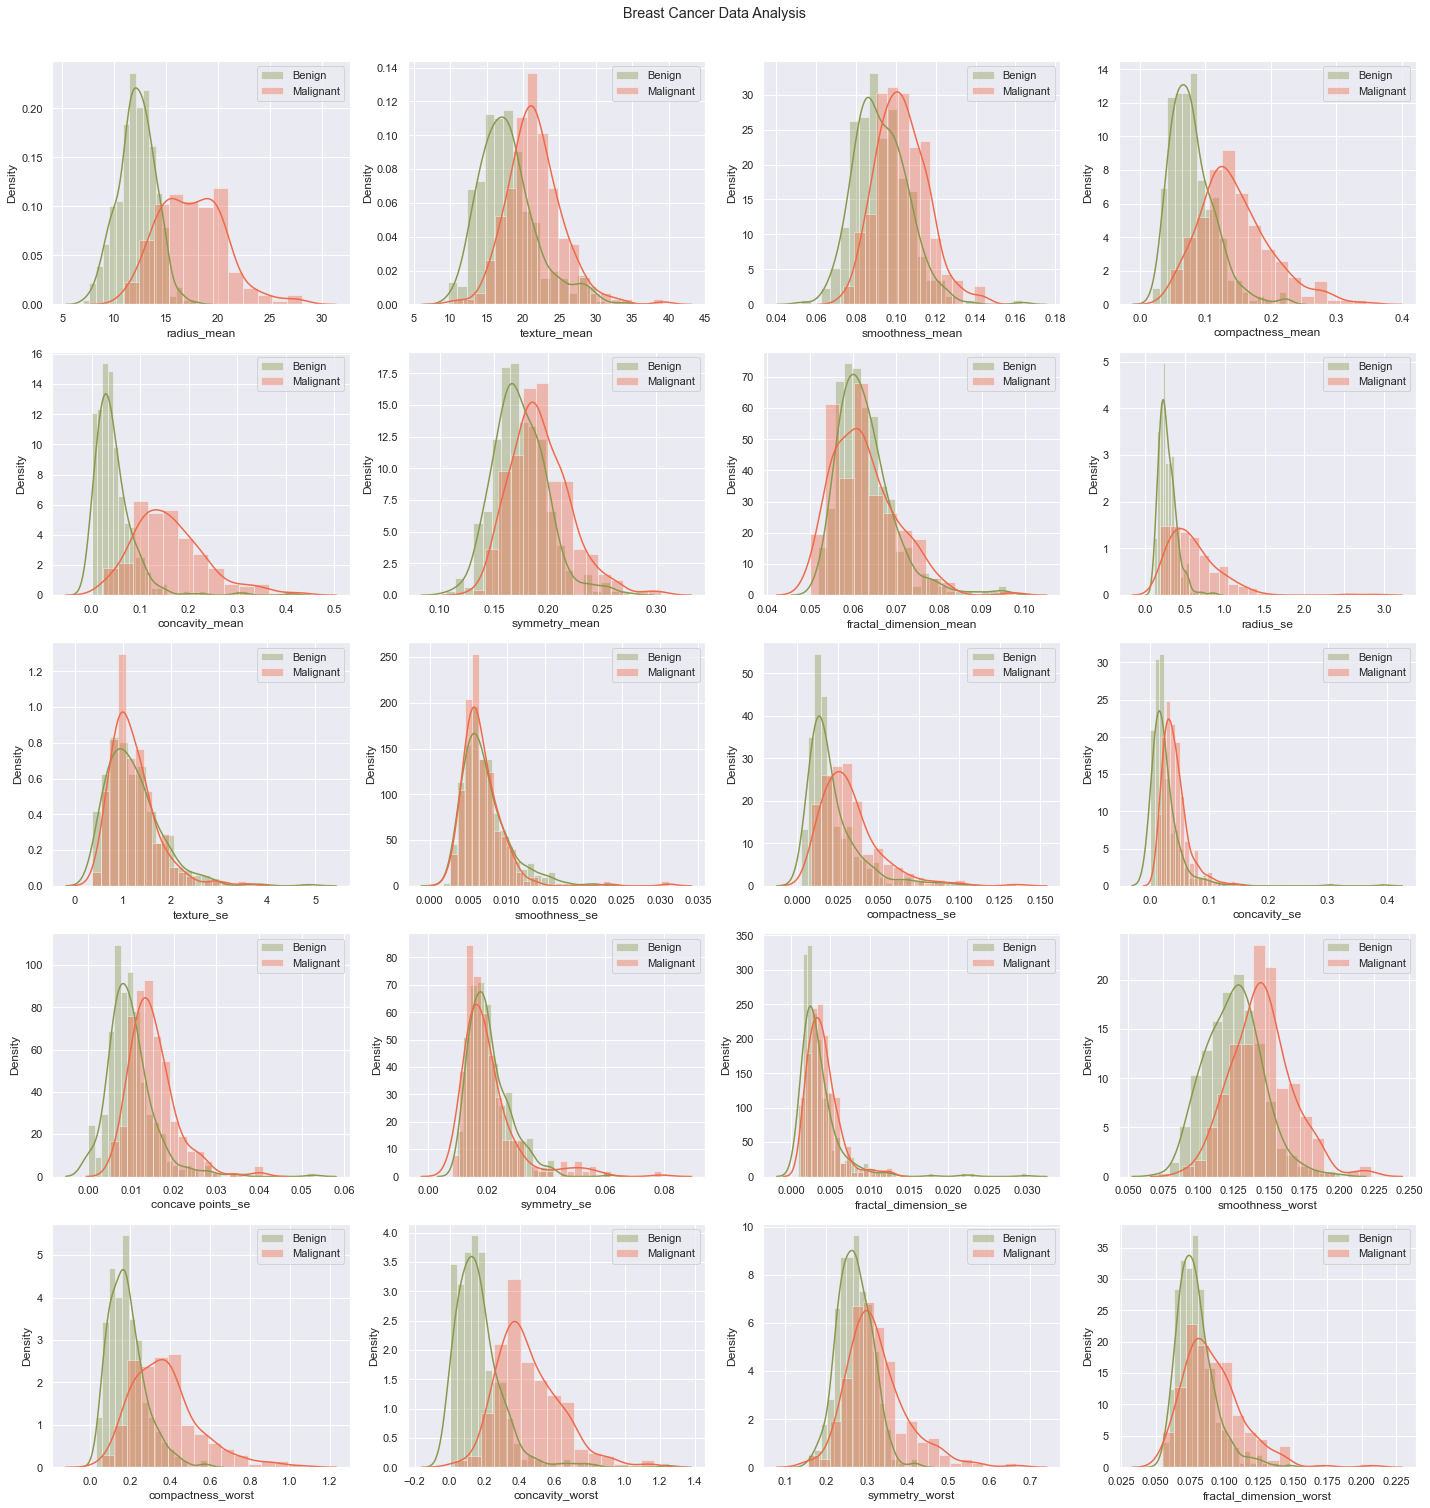

In [19]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][y['diagnosis']=='B'], color='#86994d', label = 'Benign')
    sns.distplot(data[i][y['diagnosis']=='M'], color='#ed6a4a', label = 'Malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cancer Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [20]:
data.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


### We can see that there are some features that have to be normalized before we can use them for building our model. 

First, we will encode the diagnosis column of the y dataset.

In [21]:
le = LabelEncoder()

In [22]:
y.diagnosis = le.fit_transform(y.diagnosis)

In [23]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


We see that Malignant has been encoded as 1, while Benign has been encoded as 0.

### Now, we will scale the columns so that they can be used to build our model.

In [24]:
data.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [25]:
min_max_scaler = MinMaxScaler()

In [26]:
data[["radius_mean", "texture_mean"]] = min_max_scaler.fit_transform(
    data[["radius_mean", "texture_mean"]])

In [27]:
data.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,0.643144,0.272574,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,0.601496,0.390260,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,0.210090,0.360839,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,0.629893,0.156578,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


### Splitting our dataset into training and testing samples.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

## We will try logistic regression, Random forest classifier, Decision tree classifier and support vector classifier.

We will define a function named model_build to train the models and print the classification report.

In [29]:
def model_build(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    print("CLASSIFICATION REPORT CHART: ","\n\n",classification_report(y_test, y_predicted),"\n")
    print("CONFUSION MATRIX","\n\n",confusion_matrix(y_test,y_predicted),"\n")
    print('ROC-AUC: ',roc_auc_score(y_test,y_prob[:,1]),"\n")
    print("TOTAL ACCURACY IN TRAINING: ","\n",model.score(X_train,y_train),"\n")
    print("TOTAL ACCURACY IN TESTING: ","\n",model.score(X_test,y_test),"\n")
    
    plt.figure(figsize = (15,10))
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
    plt.subplot(2, 2, 1)
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'g--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC (Receiver operating characteristic) Curve')
    plt.legend()
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob[:,1])
    plt.subplot(2, 2, 2)
    plt.title("Precision-Recall-F1 vs Threshold Chart")
    plt.plot(thresholds, precision[: -1], "b--", label="Precision")
    plt.plot(thresholds, recall[: -1], "r--", label="Recall")
    plt.plot(thresholds, (2*precision[:-1]*recall[:-1])/(precision[:-1]+recall[:-1]), "g--", label="F1_score")
    plt.ylabel("Precision, Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower left")
    plt.show()
    
    return y_predicted, y_prob

### Logistic Regression model

In [30]:
model_lr = LogisticRegression()

CLASSIFICATION REPORT CHART:  

               precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114
 

CONFUSION MATRIX 

 [[71  0]
 [ 4 39]] 

ROC-AUC:  0.99475925319358 

TOTAL ACCURACY IN TRAINING:  
 0.9274725274725275 

TOTAL ACCURACY IN TESTING:  
 0.9649122807017544 



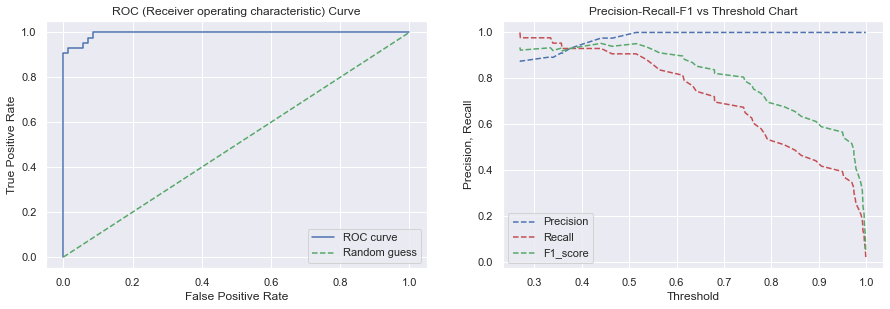

In [31]:
y_predicted_lr,y_prob_lr = model_build(model_lr, X_train, y_train, X_test)

### Random Forest Classifier

In [32]:
model_rfc = RandomForestClassifier(criterion = 'gini')

CLASSIFICATION REPORT CHART:  

               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114
 

CONFUSION MATRIX 

 [[69  2]
 [ 3 40]] 

ROC-AUC:  0.9929577464788732 

TOTAL ACCURACY IN TRAINING:  
 1.0 

TOTAL ACCURACY IN TESTING:  
 0.956140350877193 



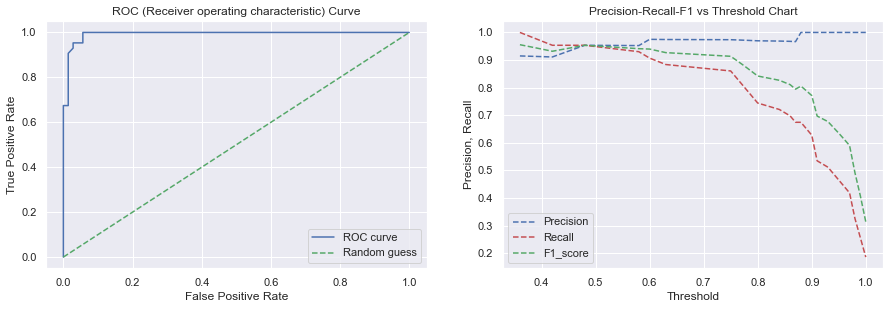

In [33]:
y_predicted_rfc,y_prob_rfc = model_build(model_rfc, X_train, y_train, X_test)

### Decision Tree Classifier

In [34]:
model_dtc = DecisionTreeClassifier()

CLASSIFICATION REPORT CHART:  

               precision    recall  f1-score   support

           0       0.93      0.92      0.92        71
           1       0.86      0.88      0.87        43

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114
 

CONFUSION MATRIX 

 [[65  6]
 [ 5 38]] 

ROC-AUC:  0.8996069439895186 

TOTAL ACCURACY IN TRAINING:  
 1.0 

TOTAL ACCURACY IN TESTING:  
 0.9035087719298246 



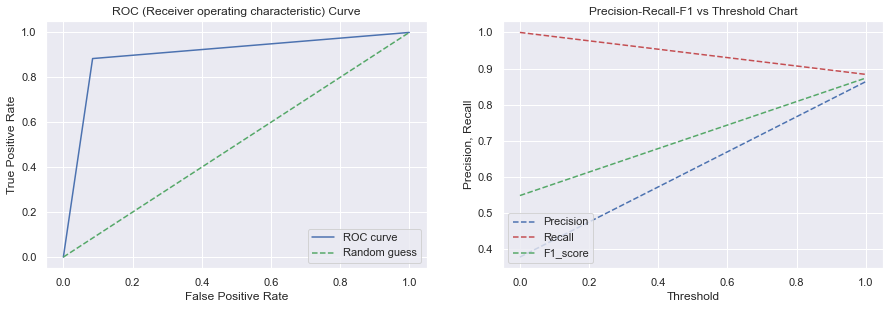

In [35]:
y_predicted_dtc,y_prob_dtc = model_build(model_dtc, X_train, y_train, X_test)

### Support Vector Classifier

In [36]:
model_svc = SVC(probability=True)

CLASSIFICATION REPORT CHART:  

               precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114
 

CONFUSION MATRIX 

 [[68  3]
 [ 4 39]] 

ROC-AUC:  0.9911562397641663 

TOTAL ACCURACY IN TRAINING:  
 0.9472527472527472 

TOTAL ACCURACY IN TESTING:  
 0.9385964912280702 



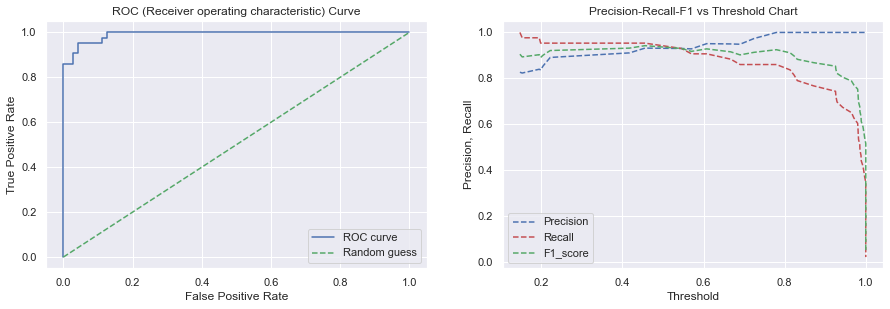

In [37]:
y_predicted_svc,y_prob_svc = model_build(model_svc, X_train, y_train, X_test)

### Performing K-fold Cross Validation to find which model has higher accuracy

In [38]:
score_lr = cross_val_score(model_lr, data, y, cv = 10)
print(f'The average score for Logistic Regression classifier is: {np.average(score_lr)}')

The average score for Logistic Regression classifier is: 0.9279448621553884


In [39]:
score_rfc = cross_val_score(model_rfc, data, y, cv = 10)
print(f'The average score for Random Forest classifier is: {np.average(score_rfc)}')

The average score for Random Forest classifier is: 0.9525689223057643


In [40]:
score_dtc = cross_val_score(model_dtc, data, y, cv = 10)
print(f'The average score for Decision Tree classifier is: {np.average(score_dtc)}')

The average score for Decision Tree classifier is: 0.9209273182957395


In [41]:
score_svc = cross_val_score(model_svc, data, y, cv = 10)
print(f'The average score for Support Vector classifier is: {np.average(score_svc)}')

The average score for Support Vector classifier is: 0.9385025062656641


We see that, out of all the models, Random forest classifier performs the best.